In [1]:
# CNN Image Classification (CIFAR-10) - With All Outputs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import json
import os

print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.19.0


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# One-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

print("Training Data:", x_train.shape)
print("Testing Data:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training Data: (50000, 32, 32, 3)
Testing Data: (10000, 32, 32, 3)


In [3]:
#Build CNN Model
def build_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_cnn()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251,242 (4.77 MB)

 Trainable params: 1,251,050 (4.77 MB)

 Non-trainable params: 192 (768.00 B)

In [4]:
#Compile & Train
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 250s 350ms/step - accuracy: 0.3380 - loss: 1.9653 - val_accuracy: 0.5166 - val_loss: 1.4043
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 255s 342ms/step - accuracy: 0.5470 - loss: 1.2621 - val_accuracy: 0.6280 - val_loss: 1.0681
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 232s 329ms/step - accuracy: 0.6293 - loss: 1.0518 - val_accuracy: 0.6738 - val_loss: 0.9228
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 232s 330ms/step - accuracy: 0.6763 - loss: 0.9346 - val_accuracy: 0.6806 - val_loss: 0.9261
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 231s 328ms/step - accuracy: 0.7014 - loss: 0.8484 - val_accuracy: 0.7184 - val_loss: 0.8134
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 264s 330ms/step - accuracy: 0.7249 - loss: 0.7853 - val_accuracy: 0.7520 - val_loss: 0.7410
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 228s 323ms/step - accuracy: 0.7414 - loss: 0.7420 - val_accuracy: 0.7424 - val_loss: 0.7764
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 229s 326ms/step - accuracy: 0.7564 -

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n🔵 FINAL TEST ACCURACY: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7727 - loss: 0.7043

🔵 FINAL TEST ACCURACY: 0.7700


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


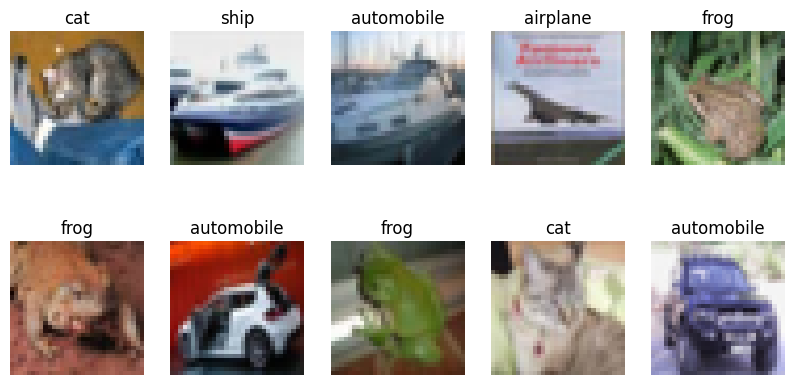

In [7]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

pred = model.predict(x_test[:10])

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[np.argmax(pred[i])])
    plt.axis('off')

plt.show()
